In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import phylopandas as ph
%matplotlib inline

sns.set(style = 'white',context= 'notebook', rc = {'figure.figsize':(14,10)})

In [ ]:
#NCBI enocding data
df = ph.read_fasta('sequences_cod2.fasta')
df

In [3]:
#Split description
x = df['description'].str.split("|", n=-1, expand = True)
#Protein names
y = x[1].str.split("[", n=-1, expand = True)
x

,0,1,2,3
0,NC_045512.2:266..805,leader protein [Severe acute respiratory syndr...,YP_009742608.1,China
1,NC_045512.2:806..2719,nsp2 [Severe acute respiratory syndrome corona...,YP_009742609.1,China
2,NC_045512.2:2720..8554,nsp3 [Severe acute respiratory syndrome corona...,YP_009742610.1,China
3,NC_045512.2:8555..10054,nsp4 [Severe acute respiratory syndrome corona...,YP_009742611.1,China
4,NC_045512.2:10055..10972,3C-like proteinase [Severe acute respiratory s...,YP_009742612.1,China
...,...,...,...,...
103320,AY278554.2:27059..27250,unknown [SARS coronavirus CUHK-W1],AAP13572.1,China
103321,AY278554.2:27258..27626,unknown [SARS coronavirus CUHK-W1],AAP13573.1,China
103322,AY278554.2:28115..28411,unknown [SARS coronavirus CUHK-W1],AAP13574.1,China
103323,AY278554.2:250..13398,orf1a polyprotein [SARS coronavirus CUHK-W1],AAP13575.1,China


In [4]:
final = pd.DataFrame(df['id'],y[0])

In [5]:
#DataFrame 
comparison = pd.DataFrame(df['id'])
comparison['type'] = y[0]
comparison['Loc'] = x[3]
comparison

,id,type,Loc
0,NC_045512.2:266..805,leader protein,China
1,NC_045512.2:806..2719,nsp2,China
2,NC_045512.2:2720..8554,nsp3,China
3,NC_045512.2:8555..10054,nsp4,China
4,NC_045512.2:10055..10972,3C-like proteinase,China
...,...,...,...
103320,AY278554.2:27059..27250,unknown,China
103321,AY278554.2:27258..27626,unknown,China
103322,AY278554.2:28115..28411,unknown,China
103323,AY278554.2:250..13398,orf1a polyprotein,China


In [6]:
#unique ids
len(df['id'].unique())

103259

In [7]:
row = pd.DataFrame(df['id'])
len(df['id'])
col = pd.DataFrame(y[0].unique())
col

,0
0,leader protein
1,nsp2
2,nsp3
3,nsp4
4,3C-like proteinase
...,...
376,putative membrane protein M
377,"RNA polymerase 1b, partial"
378,putative polyprotein orf1ab
379,putative polyprotein orf1a


In [8]:
#Run by this for reset
g =comparison.groupby(['id','type']).size()
g

id                                                       type                         
AB257344.1:21451..25218                                  spike protein                    1
AB257344.1:224..13372                                    polyprotein 1a                   1
AB257344.1:25227..26051                                  unnamed protein product          1
AB257344.1:25648..26112                                  unnamed protein product          1
AB257344.1:26076..26306                                  envelope protein                 1
                                                                                         ..
join(MT705206.1:261..13463,MT705206.1:13463..21550)      ORF1ab polyprotein               1
join(NC_004718.3:13372..13398,NC_004718.3:13398..16166)  nsp12-pp1ab (RdRp)               1
join(NC_004718.3:265..13398,NC_004718.3:13398..21485)    orf1ab polyprotein (pp1ab)       1
join(NC_045512.2:13442..13468,NC_045512.2:13468..16236)  RNA-dependent RNA polymerase

In [9]:
#Creating Final Frame
t0 =g.to_frame(name = 'size').reset_index()
#len(t0['type'].unique())
t0

,id,type,size
0,AB257344.1:21451..25218,spike protein,1
1,AB257344.1:224..13372,polyprotein 1a,1
2,AB257344.1:25227..26051,unnamed protein product,1
3,AB257344.1:25648..26112,unnamed protein product,1
4,AB257344.1:26076..26306,envelope protein,1
...,...,...,...
103310,"join(MT705206.1:261..13463,MT705206.1:13463..2...",ORF1ab polyprotein,1
103311,"join(NC_004718.3:13372..13398,NC_004718.3:1339...",nsp12-pp1ab (RdRp),1
103312,"join(NC_004718.3:265..13398,NC_004718.3:13398....",orf1ab polyprotein (pp1ab),1
103313,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",RNA-dependent RNA polymerase,1


In [10]:
table =t0.pivot(index='id',columns='type',values='size')
table

type,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,7b,...,uncharacterized protein 6,uncharacterized protein 7a,uncharacterized protein 7b,uncharacterized protein 8a,uncharacterized protein 8b,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial"
id,,,,,,,,,,,,,,,,,,,,,
AB257344.1:21451..25218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB257344.1:224..13372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB257344.1:25227..26051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
AB257344.1:25648..26112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
AB257344.1:26076..26306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"join(MT705206.1:261..13463,MT705206.1:13463..21550)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"join(NC_004718.3:13372..13398,NC_004718.3:13398..16166)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"join(NC_004718.3:265..13398,NC_004718.3:13398..21485)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
table = table.replace(np.nan,0)
tmerger =table.reset_index()
tmerger

type,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 6,uncharacterized protein 7a,uncharacterized protein 7b,uncharacterized protein 8a,uncharacterized protein 8b,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial"
0,AB257344.1:21451..25218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AB257344.1:224..13372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AB257344.1:25227..26051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,AB257344.1:25648..26112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,AB257344.1:26076..26306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103254,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103255,"join(NC_004718.3:13372..13398,NC_004718.3:1339...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103256,"join(NC_004718.3:265..13398,NC_004718.3:13398....",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103257,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
t1 =comparison.drop(['type'], axis=1)
t2 = t1.drop_duplicates(subset='id', keep='first')
t2

,id,Loc
0,NC_045512.2:266..805,China
1,NC_045512.2:806..2719,China
2,NC_045512.2:2720..8554,China
3,NC_045512.2:8555..10054,China
4,NC_045512.2:10055..10972,China
...,...,...
103320,AY278554.2:27059..27250,China
103321,AY278554.2:27258..27626,China
103322,AY278554.2:28115..28411,China
103323,AY278554.2:250..13398,China


In [13]:
#Final dataframe 
merged = pd.merge(tmerger,t2,on='id')
merged

,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 7a,uncharacterized protein 7b,uncharacterized protein 8a,uncharacterized protein 8b,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial",Loc
0,AB257344.1:21451..25218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,AB257344.1:224..13372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,AB257344.1:25227..26051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,
3,AB257344.1:25648..26112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,
4,AB257344.1:26076..26306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103254,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
103255,"join(NC_004718.3:13372..13398,NC_004718.3:1339...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canada
103256,"join(NC_004718.3:265..13398,NC_004718.3:13398....",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canada
103257,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,China


In [14]:
#Encode Countries for color
from numpy import array
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
ie1= le1.fit_transform(array(merged['Loc']))
merged['Loc_enc']= pd.DataFrame(ie1)
merged['Loc_enc'] = merged['Loc_enc'].astype('int')
merged['Loc_enc'].unique()

array([ 0, 23,  7, 16, 54,  5, 45, 21, 50, 51, 25, 26, 34, 55, 46,  1, 17,
       11, 41, 27,  3, 29, 44,  4, 18, 31, 42, 32,  8, 33, 13, 20, 19, 48,
       12, 40, 49, 14, 39, 43,  9, 30, 36, 24, 53, 15, 52,  2, 35, 22, 37,
       10, 28, 47, 38,  6])

In [15]:
#Save pickle file for data
merged.to_pickle(r'C:\Users\hp\Desktop\IMP Stuff\AlgoAsylum\UMAP\feature_encoded.pkl')

In [2]:
#Use for future runs
merged = pd.read_pickle('feature_encoded.pkl')
merged

,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 7b,uncharacterized protein 8a,uncharacterized protein 8b,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial",Loc,Loc_enc
0,AB257344.1:21451..25218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0
1,AB257344.1:224..13372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0
2,AB257344.1:25227..26051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,,0
3,AB257344.1:25648..26112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,,0
4,AB257344.1:26076..26306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103254,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands,30
103255,"join(NC_004718.3:13372..13398,NC_004718.3:1339...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canada,5
103256,"join(NC_004718.3:265..13398,NC_004718.3:13398....",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canada,5
103257,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,China,7


In [3]:
#Filtering countries for simplicity
fil = merged
ref =fil.groupby('Loc_enc').count() #reference
cond = fil.groupby('Loc_enc').count().iloc[fil['Loc_enc'],0] >=100 #Remove countries with less than 100 records
cond =cond.reset_index() #Normalise index
prc = fil[cond['id']]
cond2 = prc['Loc_enc']!=0 #Remove coutries with No country data
prc1 = prc[cond2]
cond2 = prc1['Loc_enc']!=50 #Remove USA a.k.a Majority Yellow Dots
processed = prc1[cond2]
processed #UMAP Data

#fil.groupby('Loc').count().iloc[5,0]

,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 7b,uncharacterized protein 8a,uncharacterized protein 8b,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial",Loc,Loc_enc
10,AB889995.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23
11,AB889996.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23
12,AB889997.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23
13,AB889998.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23
14,AB889999.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103035,"join(MT682732.1:253..13455,MT682732.1:13455..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,21
103253,"join(MT705205.1:256..13458,MT705205.1:13458..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands,30
103254,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands,30
103257,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,China,7


In [26]:
processed.iloc[:,3].unique()

array([0., 2.])

In [13]:
#UMAP Requirements
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer00 = umap.UMAP(n_neighbors=10, min_dist=0.1)
reducer01 = umap.UMAP(n_neighbors=15, min_dist=0.1)
reducer02= umap.UMAP(n_neighbors=20, min_dist=0.1)
reducer03 = umap.UMAP(n_neighbors=25, min_dist=0.1)
reducer04 = umap.UMAP(n_neighbors=30, min_dist=0.1)
##################################
reducer10 = umap.UMAP(n_neighbors=10, min_dist=0.3)
reducer11 = umap.UMAP(n_neighbors=15, min_dist=0.3)
reducer12= umap.UMAP(n_neighbors=20, min_dist=0.3)
reducer13 = umap.UMAP(n_neighbors=25, min_dist=0.3)
reducer14 = umap.UMAP(n_neighbors=30, min_dist=0.3)
##################################
reducer20 = umap.UMAP(n_neighbors=10, min_dist=0.5)
reducer21 = umap.UMAP(n_neighbors=15, min_dist=0.5)
reducer22= umap.UMAP(n_neighbors=20, min_dist=0.5)
reducer23 = umap.UMAP(n_neighbors=25, min_dist=0.5)
reducer24 = umap.UMAP(n_neighbors=30, min_dist=0.5)
##################################
reducer30 = umap.UMAP(n_neighbors=10, min_dist=0.7)
reducer31 = umap.UMAP(n_neighbors=15, min_dist=0.7)
reducer32= umap.UMAP(n_neighbors=20, min_dist=0.7)
reducer33 = umap.UMAP(n_neighbors=25, min_dist=0.7)
reducer34 = umap.UMAP(n_neighbors=30, min_dist=0.7)
##################################
reducer40 = umap.UMAP(n_neighbors=10, min_dist=0.9)
reducer41 = umap.UMAP(n_neighbors=15, min_dist=0.9)
reducer42= umap.UMAP(n_neighbors=20, min_dist=0.9)
reducer43 = umap.UMAP(n_neighbors=25, min_dist=0.9)
reducer44 = umap.UMAP(n_neighbors=30, min_dist=0.9)
prescale = processed.iloc[:,1:382].values #select only dimensional data
scaled= StandardScaler().fit_transform(prescale)
scaled.shape

(30443, 381)

In [23]:
embedding1 = reducer1.fit_transform(scaled)
embedding2 = reducer2.fit_transform(scaled)
embedding3 = reducer3.fit_transform(scaled)
embedding4 = reducer4.fit_transform(scaled)
embedding4.shape

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(30443, 2)

In [14]:
embedding00 = reducer00.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [15]:
embedding01 = reducer01.fit_transform(scaled)
embedding02 = reducer02.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [16]:
embedding03 = reducer03.fit_transform(scaled)
embedding04 = reducer04.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [17]:
embedding10 = reducer10.fit_transform(scaled)
embedding11 = reducer11.fit_transform(scaled)


C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [18]:
embedding12 = reducer12.fit_transform(scaled)
embedding13 = reducer13.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [19]:
embedding14 = reducer14.fit_transform(scaled)
embedding20 = reducer20.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\umap\spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


In [20]:
embedding21 = reducer21.fit_transform(scaled)
embedding22 = reducer22.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [21]:
embedding23 = reducer23.fit_transform(scaled)
embedding24 = reducer24.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [22]:
embedding30 = reducer30.fit_transform(scaled)
embedding31 = reducer31.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [23]:
embedding32 = reducer32.fit_transform(scaled)
embedding33 = reducer33.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [24]:
embedding34 = reducer34.fit_transform(scaled)
embedding40 = reducer40.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [25]:
embedding41 = reducer41.fit_transform(scaled)
embedding42 = reducer42.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [26]:
embedding44 = reducer44.fit_transform(scaled)
embedding43 = reducer43.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, '30,0.9')

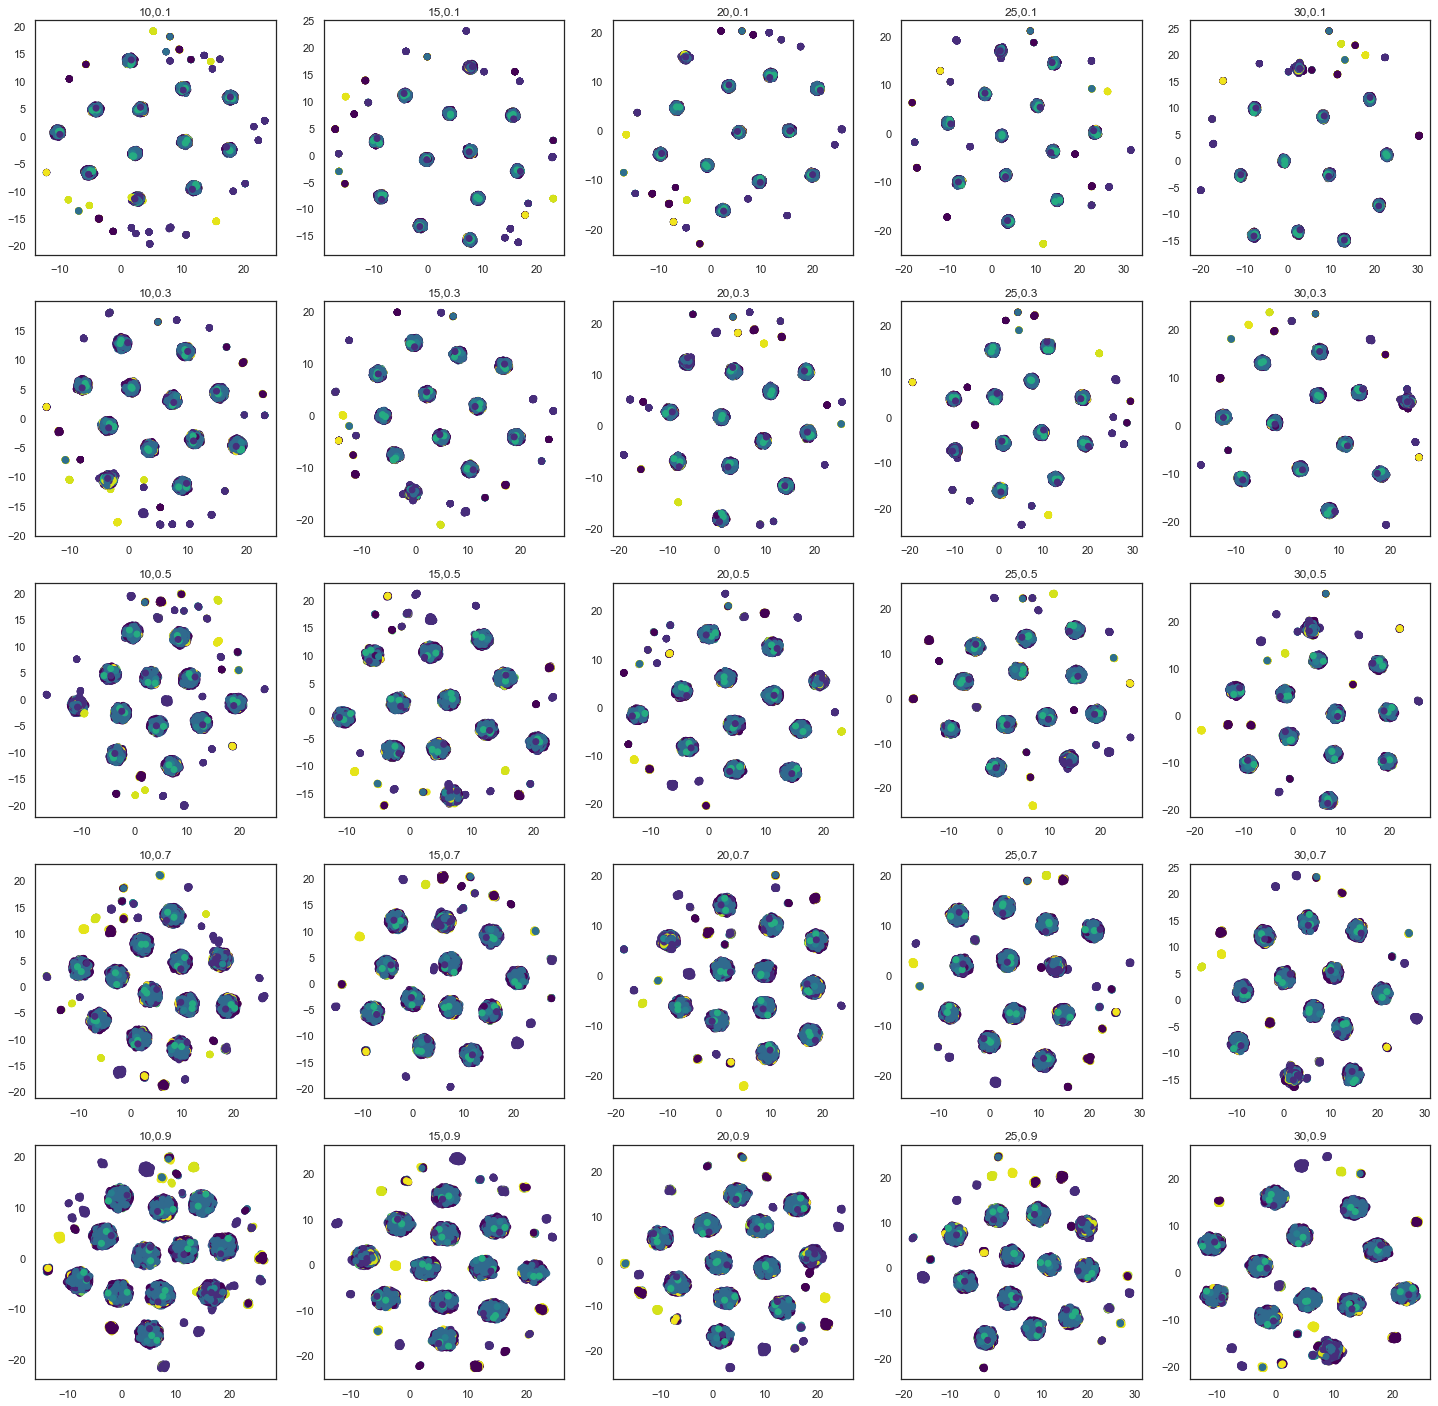

In [30]:
#Final Plot
fig, ax = plt.subplots(5, 5,figsize=(25,25))
ax[0,0].scatter(
    embedding00[:, 0],
    embedding00[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[0,0].set_title('10,0.1')
ax[0,1].scatter(
    embedding01[:, 0],
    embedding01[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[0,1].set_title('15,0.1')
ax[0,2].scatter(
    embedding02[:, 0],
    embedding02[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[0,2].set_title('20,0.1')
ax[0,3].scatter(
    embedding03[:, 0],
    embedding03[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[0,3].set_title('25,0.1')
ax[0,4].scatter(
    embedding04[:, 0],
    embedding04[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[0,4].set_title('30,0.1')
ax[1,0].scatter(
    embedding10[:, 0],
    embedding10[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[1,1].scatter(
    embedding11[:, 0],
    embedding11[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[1,2].scatter(
    embedding12[:, 0],
    embedding12[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[1,3].scatter(
    embedding13[:, 0],
    embedding13[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[1,4].scatter(
    embedding14[:, 0],
    embedding14[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[2,0].scatter(
    embedding20[:, 0],
    embedding20[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[2,1].scatter(
    embedding21[:, 0],
    embedding21[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[2,2].scatter(
    embedding22[:, 0],
    embedding22[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[2,3].scatter(
    embedding23[:, 0],
    embedding23[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[2,4].scatter(
    embedding24[:, 0],
    embedding24[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[3,0].scatter(
    embedding30[:, 0],
    embedding30[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[3,1].scatter(
    embedding31[:, 0],
    embedding31[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[3,2].scatter(
    embedding32[:, 0],
    embedding32[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[3,3].scatter(
    embedding33[:, 0],
    embedding33[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[3,4].scatter(
    embedding34[:, 0],
    embedding34[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[4,0].scatter(
    embedding40[:, 0],
    embedding40[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[4,1].scatter(
    embedding41[:, 0],
    embedding41[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[4,2].scatter(
    embedding42[:, 0],
    embedding42[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[4,3].scatter(
    embedding43[:, 0],
    embedding43[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
ax[4,4].scatter(
    embedding44[:, 0],
    embedding44[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')

ax[1,0].set_title('10,0.3')
ax[1,1].set_title('15,0.3')
ax[1,2].set_title('20,0.3')
ax[1,3].set_title('25,0.3')
ax[1,4].set_title('30,0.3')
ax[2,0].set_title('10,0.5')
ax[2,1].set_title('15,0.5')
ax[2,2].set_title('20,0.5')
ax[2,3].set_title('25,0.5')
ax[2,4].set_title('30,0.5')
ax[3,0].set_title('10,0.7')
ax[3,1].set_title('15,0.7')
ax[3,2].set_title('20,0.7')
ax[3,3].set_title('25,0.7')
ax[3,4].set_title('30,0.7')
ax[4,0].set_title('10,0.9')
ax[4,1].set_title('15,0.9')
ax[4,2].set_title('20,0.9')
ax[4,3].set_title('25,0.9')
ax[4,4].set_title('30,0.9')

In [4]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer00 = umap.UMAP(n_neighbors=15, min_dist=0.1)
prescale = processed.iloc[:,1:382].values #select only dimensional data
scaled= StandardScaler().fit_transform(prescale)
scaled.shape

(30443, 381)

In [6]:
embedding00 = reducer00.fit_transform(prescale)

KeyboardInterrupt: 

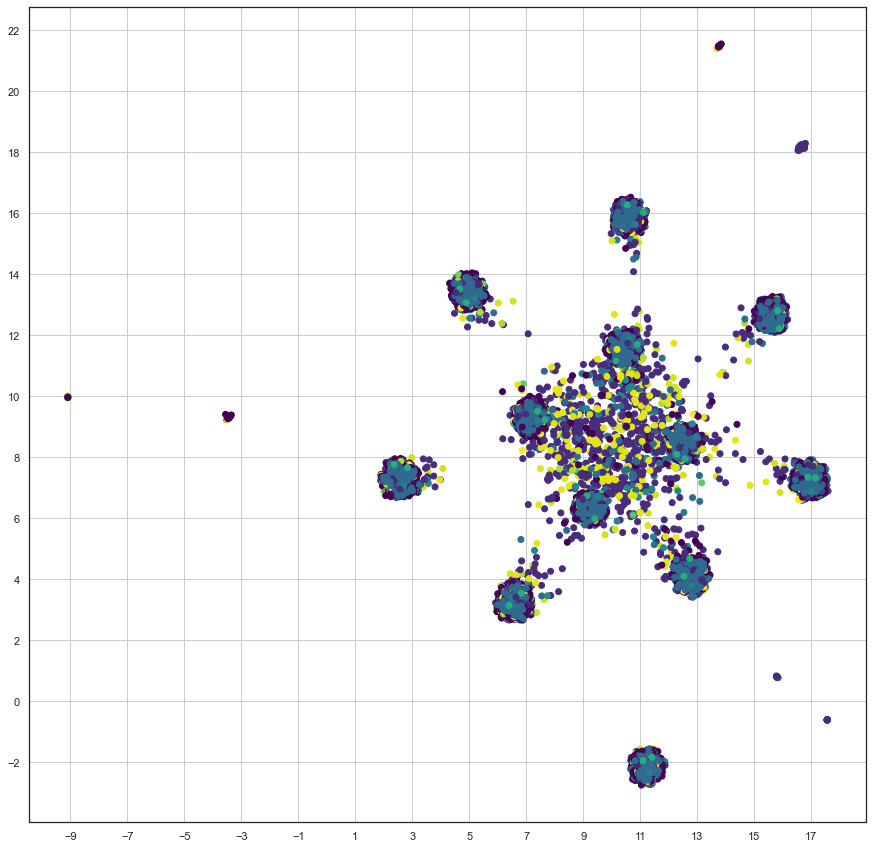

In [39]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
ax.set_xticks(np.arange(-15,28,2))
ax.set_yticks(np.arange(-20, 25, 2))
plt.grid()
plt.scatter(
    embedding00[:, 0],
    embedding00[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
plt.show()

In [5]:
embedding = reducer00.fit_transform(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


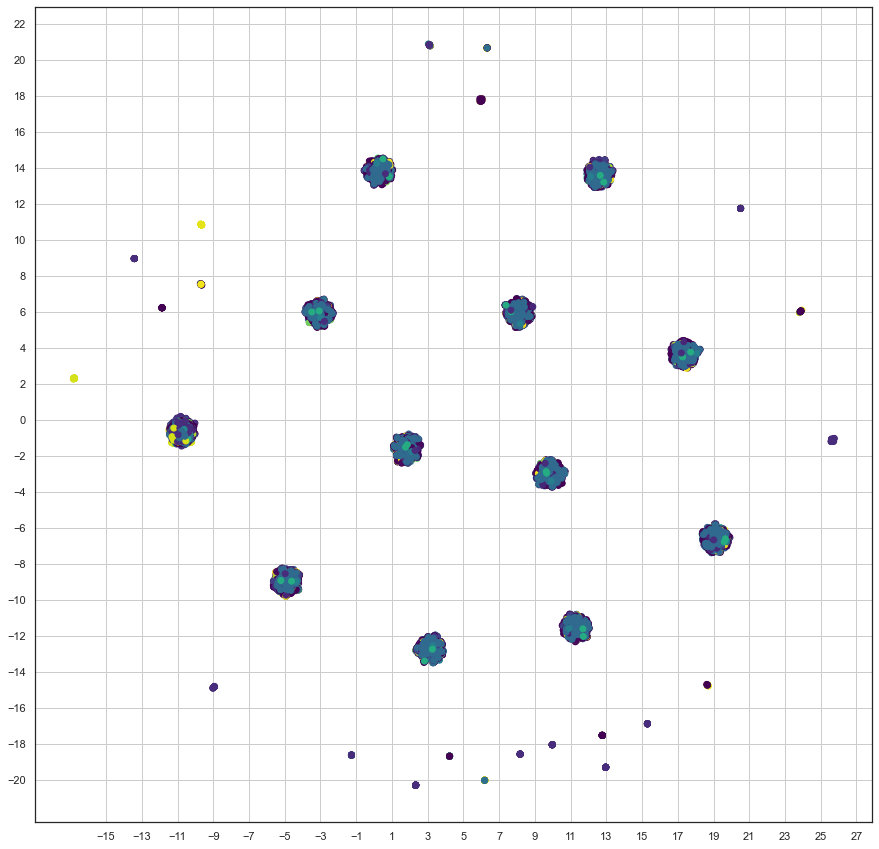

In [6]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
ax.set_xticks(np.arange(-15,28,2))
ax.set_yticks(np.arange(-20, 25, 2))
plt.grid()
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=processed['Loc_enc'],
    cmap='viridis')
plt.show()

In [7]:
embedding = pd.DataFrame(embedding)
embedding

,0,1
0,-11.074086,-0.124506
1,-10.291971,-0.125709
2,-10.696162,-0.608818
3,-10.865177,-0.177672
4,-10.333147,-0.527771
...,...,...
30438,3.288175,-12.541047
30439,3.260429,-12.728837
30440,2.819198,-13.391639
30441,-10.970784,-0.816862


In [8]:
processed = processed.reset_index(drop=True)
processed['X'] = 0
processed['Y'] = 0
for i in range(0,30443):
    processed.iloc[i,384] = embedding.iloc[i,0]
    processed.iloc[i,385] = embedding.iloc[i,1]
processed


,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 8b,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial",Loc,Loc_enc,X,Y
0,AB889995.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23,-11.074086,-0.124506
1,AB889996.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23,-10.291971,-0.125709
2,AB889997.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23,-10.696162,-0.608818
3,AB889998.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23,-10.865177,-0.177672
4,AB889999.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Japan,23,-10.333147,-0.527771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,"join(MT682732.1:253..13455,MT682732.1:13455..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Italy,21,3.288175,-12.541047
30439,"join(MT705205.1:256..13458,MT705205.1:13458..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands,30,3.260429,-12.728837
30440,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands,30,2.819198,-13.391639
30441,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,China,7,-10.970784,-0.816862


In [9]:
processed['label'] = 0
processed

,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial",Loc,Loc_enc,X,Y,label
0,AB889995.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,8.280426,-15.813798,0
1,AB889996.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,8.616688,-15.120800,0
2,AB889997.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,8.900812,-15.289644,0
3,AB889998.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,8.666870,-15.945668,0
4,AB889999.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,8.397276,-15.471187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,"join(MT682732.1:253..13455,MT682732.1:13455..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Italy,21,12.727846,-6.112817,0
30439,"join(MT705205.1:256..13458,MT705205.1:13458..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Netherlands,30,12.594884,-6.093927,0
30440,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Netherlands,30,13.194608,-5.758617,0
30441,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,China,7,8.571411,-15.649221,0


In [14]:
for i in range(0,30443):
    if (processed.iloc[i,384]<-9):
        if(processed.iloc[i,385]>-4):
            if(processed.iloc[i,385]<-2):
                processed.iloc[i,386] = 1
    elif (processed.iloc[i,384]<-5):
        if(processed.iloc[i,385]>4):
            if(processed.iloc[i,385]<8):
                processed.iloc[i,386] = 2
    elif (processed.iloc[i,384]<-3):
        if(processed.iloc[i,385]>-14):
            if(processed.iloc[i,385]<-10):
                processed.iloc[i,386] = 3
    elif (processed.iloc[i,384]<1):
        if(processed.iloc[i,385]>-4):
            if(processed.iloc[i,385]<-2):
                processed.iloc[i,386] = 4
    elif (processed.iloc[i,384]<4):
        if(processed.iloc[i,385]>14):
            if(processed.iloc[i,385]<18):
                processed.iloc[i,386] = 5
        elif(processed.iloc[i,385]<8):
            if(processed.iloc[i,385]>6):
                processed,iloc[i,386] = 6
    elif (processed.iloc[i,384]<7):
        if(processed.iloc[i,385]>-14):
            if(processed.iloc[i,385]<-10):
                processed.iloc[i,386] = 7
    elif (processed.iloc[i,384]<14):
        if(processed.iloc[i,385]>9):
            if(processed.iloc[i,385]<12):
                processed.iloc[i,386] = 10
        elif(processed.iloc[i,385]>0):
            if(processed.iloc[i,385]<2):
                processed.iloc[i,386] = 8
        elif(processed.iloc[i,385]<-6):
            if(processed.iloc[i,385]>-10):
                processed.iloc[i,386] = 9
    elif (processed.iloc[i,384]<21):
        if(processed.iloc[i,385]>2):
            if(processed.iloc[i,385]<5):
                processed.iloc[i,386] = 11
        elif(processed.iloc[i,385]<-4):
            if(processed.iloc[i,385]>-8):
                processed.iloc[i,386] = 12
processed

,id,2'-O-ribose methyltransferase,3'-to-5' exonuclease,3C-like proteinase,3a,3a protein,3b,3b protein,6,7a,...,uncharacterized protein 9b,uncharacterized protein 9c,unknown,unnamed protein product,"unnamed protein product, partial",Loc,Loc_enc,X,Y,label
0,AB889995.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,18.255054,-8.338652,0
1,AB889996.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,18.643007,-8.024232,0
2,AB889997.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,18.484129,-8.414925,0
3,AB889998.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,17.940931,-8.075527,0
4,AB889999.1:<1..>426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Japan,23,18.224209,-7.693993,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,"join(MT682732.1:253..13455,MT682732.1:13455..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Italy,21,4.709518,2.695149,0
30439,"join(MT705205.1:256..13458,MT705205.1:13458..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Netherlands,30,4.903759,3.168361,0
30440,"join(MT705206.1:261..13463,MT705206.1:13463..2...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Netherlands,30,4.263127,3.744967,0
30441,"join(NC_045512.2:13442..13468,NC_045512.2:1346...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,China,7,18.770988,-8.242268,0


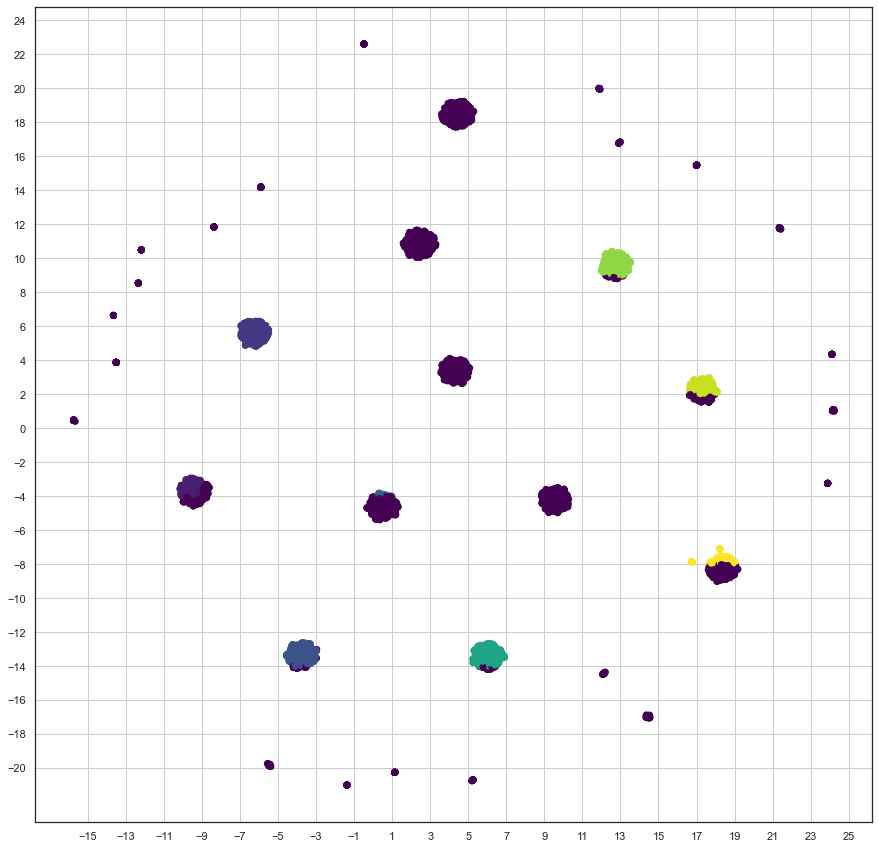

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
ax.set_xticks(np.arange(-15,28,2))
ax.set_yticks(np.arange(-20, 25, 2))
plt.grid()
plt.scatter(
    processed['X'],
    processed['Y'],
    c=processed['label'],
    cmap='viridis')
plt.show()


In [9]:
import plotly.express as px
import plotly
fig = px.scatter(processed, x='X',y ='Y', color= 'Loc')
plotly.offline.plot(fig)

'temp-plot.html'

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(scaled)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [35]:
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

In [38]:
sph = pd.DataFrame(processed['Loc'])
sph['X'] = 0
sph['Y'] = 0
sph['Z'] = 0
sph.iloc[:,1] = x
sph.iloc[:,2] = y
sph.iloc[:,3] = z
sph

,Loc,X,Y,Z
0,Japan,0.496715,-0.248279,0.831644
1,Japan,0.711101,-0.195788,0.675279
2,Japan,0.227049,-0.519338,0.823855
3,Japan,0.550454,-0.107181,0.827957
4,Japan,0.506602,0.232115,0.830348
...,...,...,...,...
30438,Italy,-0.704825,-0.166119,-0.689657
30439,Netherlands,-0.618931,0.277696,-0.734717
30440,Netherlands,-0.876067,0.308769,-0.370363
30441,China,0.124397,-0.162592,0.978820


In [39]:
fig3 = px.scatter_3d(sph, x='X',y ='Y',z = 'Z', color= 'Loc')
plotly.offline.plot(fig3)

'temp-plot.html'

In [40]:
x = np.arctan2(x, y)
y = -np.arccos(z)

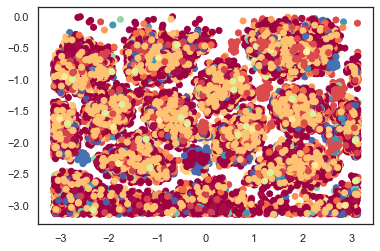

In [42]:
plt.scatter(x, y, c=processed['Loc_enc'], cmap='Spectral')